# Работа с Excel

Материалы:
* Макрушин С.В. Лекция 7: Работа с Excel
* https://docs.xlwings.org/en/stable/quickstart.html
* https://nbviewer.jupyter.org/github/pybokeh/jupyter_notebooks/blob/master/xlwings/Excel_Formatting.ipynb#search_text


## Задачи для совместного разбора

1. На листе "Рецептура" файла `себестоимостьА_в1.xlsx` для области "Пшеничный хлеб" рассчитать себестоимость всех видов продукции.

In [1]:
import openpyxl

bread = openpyxl.open("себестоимостьА_в1.xlsx")
sheet = bread.active

prices = [sheet[14][col].value for col in range(6, 15)]

hungarian_ingr = [sheet[7][column].value for column in range(6, 15) if sheet[7][column].value]
bread1 = [i * j for i, j in zip(prices, hungarian_ingr)]

barbary_ingr = [sheet[8][column].value for column in range(6, 15) if sheet[8][column].value]
bread2 = [i * j for i, j in zip(prices, barbary_ingr)]

paris_ingr = [sheet[9][column].value for column in range(6, 15) if sheet[9][column].value]
bread3 = [i * j for i, j in zip(prices, paris_ingr)]

ciabatta = [sheet[10][column].value for column in range(6, 15) if sheet[10][column].value]
bread4 = [i * j for i, j in zip(prices, ciabatta)]

print(f'Себестоимость хлеба Венгерский: {sum(bread1)}\nСебестоимость хлеба Барбари: {sum(bread2):.2f}\nСебестоимость хлеба парижский: {sum(bread3)}\nСебестоимость хлеба Чиабатта: {sum(bread4)}')

Себестоимость хлеба Венгерский: 21.48
Себестоимость хлеба Барбари: 28.72
Себестоимость хлеба парижский: 21.816
Себестоимость хлеба Чиабатта: 5.615


2. Результаты расчетов 1.1 сохранить в отдельном столбце области "Пшеничный хлеб"

3. Приблизить форматирование столбца, добавленного в задаче 2 к оформлению всей области.

4. Выполнить 3 с помощью "протягиваемых" формул.

## Лабораторная работа 7.1

1. Загрузите данные из файлов `reviews_sample.csv` (__ЛР2__) и `recipes_sample.csv` (__ЛР5__) в виде `pd.DataFrame`. Обратите внимание на корректное считывание столбца(ов) с индексами. Оставьте в таблице с рецептами следующие столбцы: `id`, `name`, `minutes`, `submitted`, `description`, `n_ingredients`

In [2]:
import pandas as pd

reviews = pd.read_csv("reviews_sample.csv")
recipes = pd.read_csv("recipes_sample.csv")[["id", "name", "minutes", "submitted", "description", "n_ingredients"]]
recipes


,id,name,minutes,submitted,description,n_ingredients
0,44123,george s at the cove black bean soup,90,2002-10-25,an original recipe created by chef scott meska...,18.0
1,67664,healthy for them yogurt popsicles,10,2003-07-26,my children and their friends ask for my homem...,NaN
2,38798,i can t believe it s spinach,30,2002-08-29,"these were so go, it surprised even me.",8.0
3,35173,italian gut busters,45,2002-07-27,my sister-in-law made these for us at a family...,NaN
4,84797,love is in the air beef fondue sauces,25,2004-02-23,i think a fondue is a very romantic casual din...,NaN
...,...,...,...,...,...,...
29995,267661,zurie s holey rustic olive and cheddar bread,80,2007-11-25,this is based on a french recipe but i changed...,10.0
29996,386977,zwetschgenkuchen bavarian plum cake,240,2009-08-24,"this is a traditional fresh plum cake, thought...",11.0
29997,103312,zwiebelkuchen southwest german onion cake,75,2004-11-03,this is a traditional late summer early fall s...,NaN
29998,486161,zydeco soup,60,2012-08-29,this is a delicious soup that i originally fou...,NaN


2. Случайным образом выберите 5% строк из каждой таблицы и сохраните две таблицы на разные листы в один файл `recipes.xlsx`. Дайте листам названия "Рецепты" и "Отзывы", соответствующие содержанию таблиц. 

In [3]:
random_reviews = reviews.sample(n=int(0.05 * len(reviews)))
random_recipes = recipes.sample(n=int(0.05 * len(recipes)))
with pd.ExcelWriter("recipes.xlsx") as writer:
    random_recipes.to_excel(writer, sheet_name="Recipes")
    random_reviews.to_excel(writer, sheet_name="Reviews")

In [4]:
random_recipes

,id,name,minutes,submitted,description,n_ingredients
4447,488275,calabacitas mexican style zucchini,35,2012-10-07,"from the family circle magazine, ca. 1982.",10.0
7935,200682,cranberry lime squares,60,2006-12-16,from a special holiday edition of the newspape...,NaN
6189,32654,chile cornbread,65,2002-06-30,great taste!,NaN
29274,283845,white chocolate cranberry oatmeal cookies,25,2008-02-03,"ooh, these are good cookies! the mixture of w...",14.0
7134,320534,citrus rubbed whole duck,135,2008-08-20,"from emeril lagasse, this is a great duck reci...",NaN
...,...,...,...,...,...,...
178,324047,3 2 1 dip,45,2008-09-09,i got this from a friend. it's easy and delic...,3.0
14321,189354,hungarian mushrooms with spaetzle sptzle,25,2006-10-05,not healthy and low fat! i first tried this in...,13.0
18495,67113,n e crab rolls,15,2003-07-20,"total summer food, this is great with lobster ...",10.0
13906,262050,homemade soft taco shells,30,2007-10-29,delicious corn tortilla shells for tacos. whit...,5.0


3. Используя `xlwings`, добавьте на лист `Рецепты` столбец `seconds_assign`, показывающий время выполнения рецепта в секундах. Выполните задание при помощи присваивания массива значений диапазону ячеек.

In [5]:
import xlwings as xw

wb = xw.Book("recipes.xlsx")
sh_recipes = wb.sheets("Recipes")
# new_col = wb.sheets("Recipes").range('H:H').insert()
sh_recipes["H1"].value = "seconds_assign"
seconds = recipes["minutes"] * 60
sh_recipes.range("H2").options(transpose = True).value = list(seconds)

4. Используя `xlwings`, добавьте на лист `Рецепты` столбец `seconds_formula`, показывающий время выполнения рецепта в секундах. Выполните задание при помощи формул Excel.

In [ ]:
# new_col2 = wb.sheets("Recipes").range('I:I').insert()
sh_recipes["I1"].value = "seconds_formula"
for i in range(2, len(seconds)+2):
    sh_recipes.range('I'+str(i)).formula = '=H' + str(i)

5. Сделайте названия всех добавленных столбцов полужирными и выровняйте по центру ячейки.

In [ ]:
import openpyxl.styles

sh_recipes.range('H1:I1').api.Font.Bold
sh_recipes.range('H1:I1').api.HorizontalAlignment = xw.constants.HAlign.xlHAlignCenter 

6. Раскрасьте ячейки столбца `minutes` в соответствии со следующим правилом: если рецепт выполняется быстрее 5 минут, то цвет - зеленый; от 5 до 10 минут - жёлтый; и больше 10 - красный.

In [ ]:
for i in range(2, 1502):
    if int(sh_recipes.range(f'D{i}').value) < 5:
        sh_recipes.range(f'D{i}').color = (0, 128, 0) #grean RGB code
    elif int(sh_recipes.range('D'+str(i)).value) >= 5 and int(sh_recipes.range('D'+str(i)).value) <= 10:
        sh_recipes.range(f'D{i}').color = (255, 255, 0) #yellow
    elif int(sh_recipes.range(f'D{i}').value) > 10:
        sh_recipes.range(f'D{i}').color = (255, 0, 0) #red

7. Добавьте на лист `Рецепты`  столбец `n_reviews`, содержащий кол-во отзывов для этого рецепта. Выполните задание при помощи формул Excel.

In [ ]:
sh_recipes.range('J2:J1501').formula = '=COUNTIF(Отзывы!$C$2:$C$6336, C2)'

## Лабораторная работа 7.2

8. Напишите функцию `validate()`, которая проверяет соответствие всех строк из листа `Отзывы` следующим правилам:
    * Рейтинг - это число от 0 до 5 включительно
    * Соответствующий рецепт имеется на листе `Рецепты`
    
В случае несоответствия этим правилам, выделите строку красным цветом

In [ ]:
import xlwings as xw
import openpyxl.styles

sh_reviews = wb.sheets['Reviews']

def validate(line_rat, line_res):
    if (sh_reviews.range(line_rat).value in [0, 1, 2, 3, 4, 5]) and (sh_reviews.range(line_res).value in sh_recipes.range('C2:C1501').value):
        print('Соответствие верно')
    else:
        sh_reviews.range('A'+str(line_rat[1])+':F'+str(line_rat[1])).fill = openpyxl.styles.PatternFill('solid', fgColor = 'ff0000')
        
for i in range(2, 6338):
    validate('E'+str(i), 'C'+str(i))

9. В файле `recipes_model.csv` находится модель данных предметной области "рецепты". При помощи пакета `csv` считайте эти данные. При помощи пакета `xlwings` запишите данные на лист `Модель` книги `recipes_model.xlsx`, начиная с ячейки `A2`, не используя циклы. Сделайте скриншот текущего состояния листа и прикрепите в ячейку ноутбука. 

In [24]:
import xlwings as xw
import csv

with open('recipes_model.csv', 'r', encoding='utf-8') as file:
    reader = csv.reader(file, delimiter = '\t')
    data = list(reader)
    
wb2 = xw.Book()
sheet = wb2.sheets.add('Model')

sheet.range('A2').value = data

wb2.save('recipes_model1.xlsx')
wb2.close()

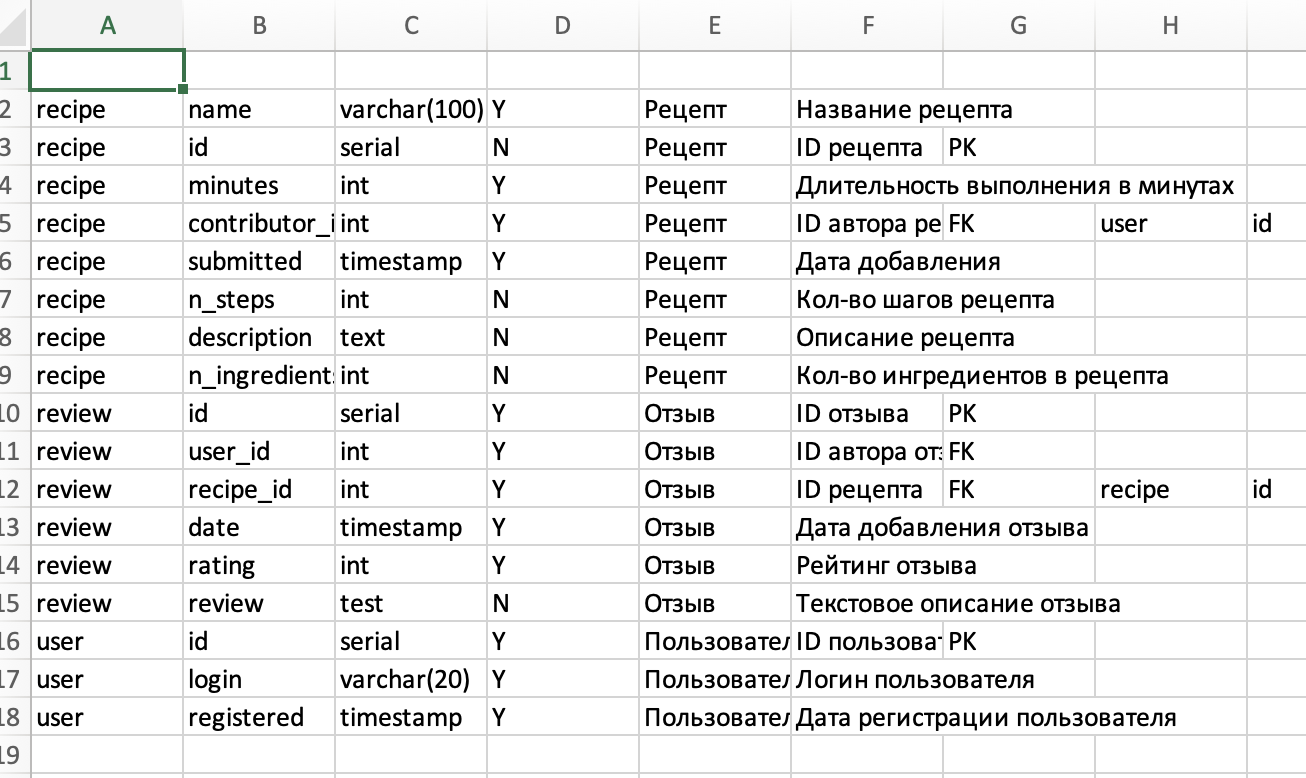

10. При помощи пакета `xlwings` добавьте в столбец J формулу для описания столбца на языке SQL. Формула должна реализовывать следующую логику:

    1\. в начале строки идут значения из столбцов В и C (значение столбца С приведено к верхнему регистру), разделенные пробелом
    
    2\. далее идут слова на основе столбца "Ключ"
        2.1 если в столбце "Ключ" указано значение "PK", то дальше через пробел идет ключевое слово "PRIMARY KEY"
        2.2 если в столбце "Ключ" указано значение "FK", то дальше через пробел идет ключевое слово "REFERENCES", затем значения столбцов H и I в формате "название_таблицы(название_столбца)"
        
    3\. если в столбце "Обязательно к заполнению" указано значение "Y" и в столбце "Ключ" указано не "PK", то дальше через пробел идет ключевое слово "NOT NULL".

Заполните этой формулой необходимое количество строк, используя "протягивание". Количество строк для протягивания определите на основе данных.

Сделайте скриншот текущего состояния листа и прикрепите в ячейку ноутбука.

In [26]:
wb = xw.Book('recipes_model1.xlsx')
sheet = wb.sheets['Модель']

num_rows = sheet.range('A2').current_region.last_cell.row - 1

for i in range(2, num_rows+2):
    b_val = sheet.range(f'B{i}').value
    c_val = sheet.range(f'C{i}').value.upper()
    h_val = sheet.range(f'H{i}').value
    i_val = sheet.range(f'I{i}').value
    
    j_val = f'{b_val} {c_val}'
    key_val = sheet.range(f'F{i}').value
    if key_val == 'PK':
        j_val += ' PRIMARY KEY'
    elif key_val == 'FK':
        j_val += f' REFERENCES {h_val}({i_val})'
        
    required_val = sheet.range(f'D{i}').value
    if required_val == 'Y' and key_val != 'PK':
        j_val += ' NOT NULL'

    sheet.range(f'J{i}').value = j_val
    
wb.save('recipes_model.xlsx')
wb.close()

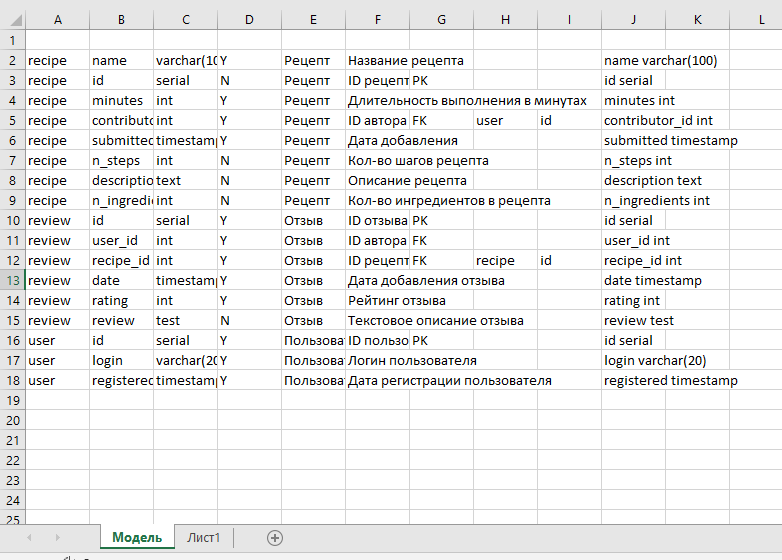

11. При помощи пакета `xlwings` измените стилизацию листа `Модель`.
* для заголовков добавьте заливку цвета `00ccff`
* примените автоподбор ширины столбца;
* сделайте шрифт заголовков полужирным;
* добавьте таблице автофильтр.

Сделайте скриншот текущего состояния листа и прикрепите в ячейку ноутбука.

In [ ]:
wb = xw.Book('recipes_model1.xlsx')
sht = wb.sheets['Модель']

sht.range('A2:J2').color = (0, 204, 255)
sht.autofit('c')
sht.range('A2:J2').api.Font.Bold = True
sht.range('A2:J2').api.AutoFilter()

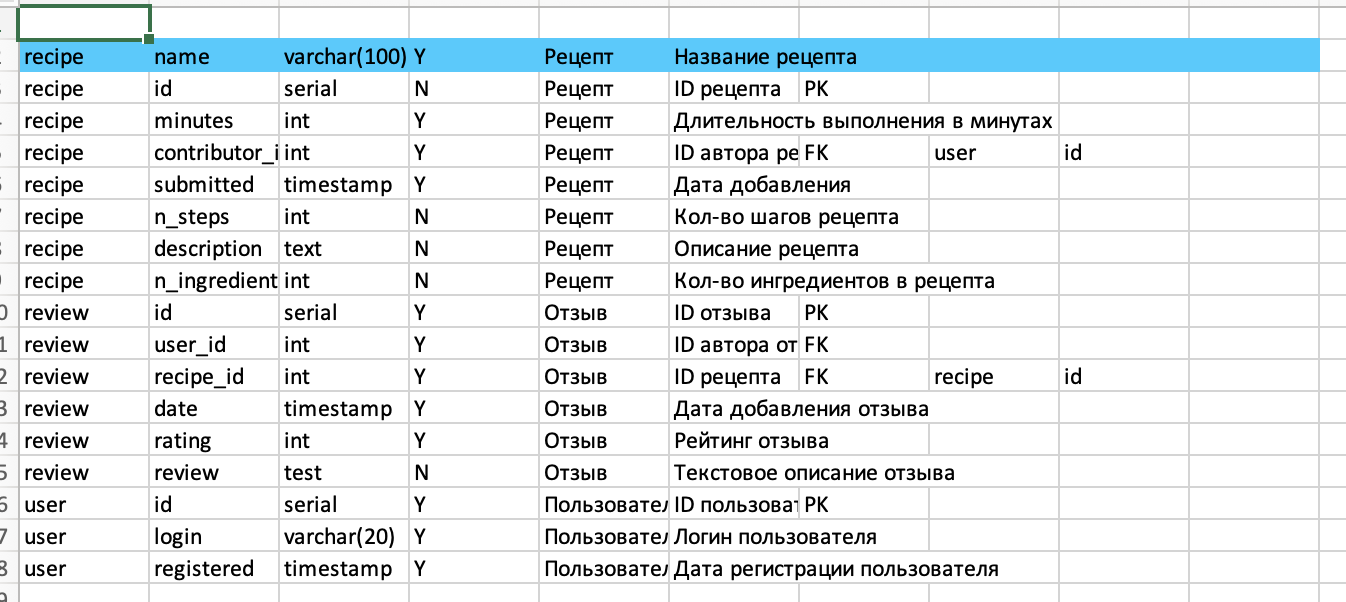

12. Посчитайте количество атрибутов для каждой из сущностей. Создайте лист `Статистика` и запишите в него результат группировки, начиная с ячейки "А1". Визуализируйте полученный результат при помощи столбчатой диаграммы. Сохраните полученную визуализацию на лист `Статистика`, начиная с ячейки "E2".  Сделайте скриншот листа `Статистика` и прикрепите в ячейку ноутбука.

* Вы можете воспользоваться методами для визуализации, которые поставляются вместе с объектами `pandas` (см. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot) 